In [1]:
# Import modules
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#load data
data= pd.read_csv('D:/10Academy Train/Week1/DATA/Week1_challenge_data_source(CSV).csv')
data.head(4)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0


In [7]:
#select only needed variables
data_task3= data[['MSISDN/Number', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 
           'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
           'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
            'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
                '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
                'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
                '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',            
           'Handset Type']].copy()
data_task3.head(4)

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Handset Type
0,3.366496e+10,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Galaxy A5 Sm-A520F
1,3.368185e+10,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Galaxy J5 (Sm-J530)
2,3.376063e+10,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Galaxy A8 (2018)
3,3.375034e+10,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,undefined


In [8]:
#check the missing values and replace with mean or mode
def percent_missing(df):
    totalCells = np.product(df.shape)
    missingCount = df.isnull().sum()
    totalmissing = missingCount.sum()
    
    print("The Telcom dataset contains", round(((totalmissing/totalCells)*100),2), "%"," missing values.")
percent_missing(data_task3) 

The Telcom dataset contains 10.34 %  missing values.


In [9]:
data_task3.isnull().sum()

MSISDN/Number                      1066
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
TCP DL Retrans. Vol (Bytes)       88146
TCP UL Retrans. Vol (Bytes)       96649
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Handset Type                        572
dtype: int64

In [10]:
data_task3['MSISDN/Number']=data_task3['MSISDN/Number'].fillna(method='ffill')
data_task3['Handset Type']=data_task3['Handset Type'].fillna(method='ffill')

In [11]:
data_task3.fillna(data_task3.mean(), inplace = True)

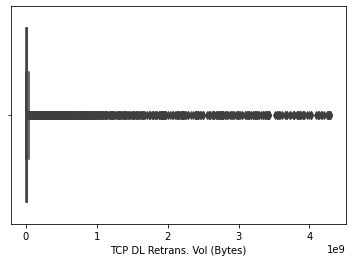

In [13]:
#check outliers
sns.boxplot(x=data_task3['TCP DL Retrans. Vol (Bytes)'], data=data_task3)

In [17]:
def outlier(df):
    column_name=['Avg RTT DL (ms)','Avg RTT UL (ms)','TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
                'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
                'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
                '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
                'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
                '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)']
    for i in column_name:
        upper_quartile=df[i].quantile(0.75)
        lower_quartile=df[i].quantile(0.25)
        df[i]=np.where(df[i]>upper_quartile,df[i].mean(),np.where(df[i]<lower_quartile,df[i].mean(),df[i]))
    return df

data_task3_n=outlier(data_task3)
data_task3_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   MSISDN/Number                   150001 non-null  float64
 1   Avg RTT DL (ms)                 150001 non-null  float64
 2   Avg RTT UL (ms)                 150001 non-null  float64
 3   Avg Bearer TP DL (kbps)         150001 non-null  float64
 4   Avg Bearer TP UL (kbps)         150001 non-null  float64
 5   TCP DL Retrans. Vol (Bytes)     150001 non-null  float64
 6   TCP UL Retrans. Vol (Bytes)     150001 non-null  float64
 7   DL TP < 50 Kbps (%)             150001 non-null  float64
 8   50 Kbps < DL TP < 250 Kbps (%)  150001 non-null  float64
 9   250 Kbps < DL TP < 1 Mbps (%)   150001 non-null  float64
 10  DL TP > 1 Mbps (%)              150001 non-null  float64
 11  UL TP < 10 Kbps (%)             150001 non-null  float64
 12  10 Kbps < UL TP 

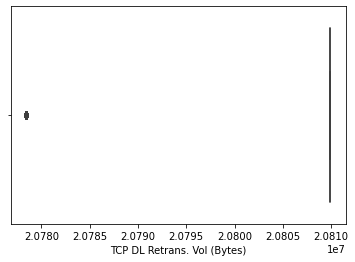

In [18]:
sns.boxplot(x=data_task3_n['TCP DL Retrans. Vol (Bytes)'], data=data_task3_n)

In [21]:
data_task3_n['Total TCP retransmission']= data_task3_n['TCP DL Retrans. Vol (Bytes)']+ data_task3_n['TCP UL Retrans. Vol (Bytes)']
data_task3_n['Total RTT']= data_task3_n['Avg RTT DL (ms)']+ data_task3_n['Avg RTT DL (ms)']
data_task3_n['Total throughput']= data_task3_n['DL TP < 50 Kbps (%)']+ data_task3_n['50 Kbps < DL TP < 250 Kbps (%)']+data_task3_n['250 Kbps < DL TP < 1 Mbps (%)']+data_task3_n['DL TP > 1 Mbps (%)']+data_task3_n['UL TP < 10 Kbps (%)']+data_task3_n['10 Kbps < UL TP < 50 Kbps (%)']+data_task3_n['50 Kbps < UL TP < 300 Kbps (%)']+data_task3_n['UL TP > 300 Kbps (%)']

In [23]:
data_by_customer=data_task3_n.groupby('MSISDN/Number').agg({'Total TCP retransmission':'sum',
                                                          'Total RTT':'sum',
                                                           'Total throughput':'sum',
                                                           'Handset Type': lambda x: x.mode()[0]})
data_by_customer.head()

,Total TCP retransmission,Total RTT,Total throughput,Handset Type
MSISDN/Number,,,,
3.360100e+10,2.156957e+07,170.169964,200.000000,Huawei P20 Lite Huawei Nova 3E
3.360100e+10,2.156957e+07,219.591412,200.000000,Apple iPhone 7 (A1778)
3.360100e+10,2.156957e+07,219.591412,200.000000,undefined
3.360101e+10,2.156957e+07,138.000000,200.000000,Apple iPhone 5S (A1457)
3.360101e+10,4.310764e+07,391.591412,396.433083,Apple iPhone Se (A1723)


In [27]:
#Task 3.2 - Compute & list 10 of the top, bottom and most frequent: TCP values in the dataset. RTT values in the dataset Throughput values in the dataset.
tcp=data_by_customer.sort_values(by=['Total TCP retransmission'], ascending=False)
tcp_top_10=tcp.head(10)
tcp_bot_10=tcp.tail(10)
tcp_frq=tcp['Total TCP retransmission'].value_counts().head(10)
tcp_top_10[['Total TCP retransmission']]

,Total TCP retransmission
MSISDN/Number,
3.362632e+10,3.882523e+08
3.361489e+10,3.666827e+08
3.362578e+10,3.666827e+08
3.365973e+10,3.451132e+08
3.376054e+10,3.234802e+08
3.367588e+10,3.233208e+08
3.366716e+10,2.803729e+08
3.378632e+10,2.588349e+08
3.362708e+10,2.588349e+08


In [28]:
tcp_bot_10[['Total TCP retransmission']]

,Total TCP retransmission
MSISDN/Number,
3.365023e+10,2.153769e+07
3.361153e+10,2.153769e+07
3.365023e+10,2.153769e+07
3.366160e+10,2.153769e+07
3.368121e+10,2.153769e+07
3.365022e+10,2.153769e+07
3.368119e+10,2.153769e+07
3.365022e+10,2.153769e+07
3.368113e+10,2.153769e+07


In [31]:
tcp_frq

2.156957e+07    46854
2.156957e+07    12579
4.313915e+07     7490
2.156957e+07     5672
4.313915e+07     4719
2.153806e+07     4566
2.153769e+07     3071
2.156920e+07     2365
4.313915e+07     2210
2.156957e+07     1671
Name: Total TCP retransmission, dtype: int64

In [38]:
#find RTT Values in the dataset
rtt=data_by_customer.sort_values(by=['Total RTT'], ascending=False)
rtt_top_10=rtt.head(10)
rtt_bot_10=rtt.tail(10)
rtt_frq=rtt['Total RTT'].value_counts().head(10)
rtt_top_10[['Total RTT']]

,Total RTT
MSISDN/Number,
3.362632e+10,3952.645418
3.361489e+10,3683.632557
3.362578e+10,3580.619697
3.376054e+10,3244.449733
3.365973e+10,3019.248109
3.366716e+10,2755.845460
3.378632e+10,2635.096945
3.367588e+10,2513.284127
3.366646e+10,2415.505533


In [36]:
rtt_bot_10[['Total RTT']]

,Total RTT
MSISDN/Number,
3.366889e+10,108.0
3.366059e+10,108.0
3.365833e+10,108.0
3.361551e+10,108.0
3.366060e+10,108.0
3.360382e+10,108.0
3.361555e+10,108.0
3.361557e+10,108.0
3.376030e+10,108.0


In [39]:
rtt_frq

219.591412    29227
170.169964    18477
219.591412    16291
439.182824     4187
389.761376     3628
340.339927     2288
439.182824     1930
439.182824     1541
389.761376     1314
110.000000      679
Name: Total RTT, dtype: int64

In [42]:
throuput=data_by_customer.sort_values(by=['Total throughput'], ascending=False)
throuput_top_10=throuput.head(10)
throuput_bot_10=throuput.tail(10)
throuput_frq=throuput['Total throughput'].value_counts().head(10)
throuput_top_10[['Total throughput']]

,Total throughput
MSISDN/Number,
3.362632e+10,3579.486439
3.361489e+10,3385.404079
3.362578e+10,3380.880343
3.365973e+10,3163.803872
3.376054e+10,2985.061744
3.367588e+10,2970.597780
3.366716e+10,2574.504905
3.378632e+10,2391.680163
3.362708e+10,2385.668677


In [43]:
throuput_bot_10[['Total throughput']]

,Total throughput
MSISDN/Number,
3.366592e+10,192.850297
3.376035e+10,192.695051
3.365933e+10,192.695051
3.376133e+10,192.695051
3.365815e+10,192.695051
3.366321e+10,192.695051
3.369942e+10,192.371338
3.366701e+10,192.371338
3.365019e+10,192.371338


In [44]:
throuput_frq

200.000000    47448
400.000000     7146
196.433083     5104
199.000000     2994
198.000000     2671
396.433083     2594
195.764406     1993
197.000000     1707
195.393068     1069
196.393068     1006
Name: Total throughput, dtype: int64

In [59]:
##Tak 3.3
handset_type = data_by_customer.groupby('Handset Type').agg(
    {'Total throughput': 'mean', 'Total RTT': 'mean', 'Total TCP retransmission':'mean'})
handset_type.head()

,Total throughput,Total RTT,Total TCP retransmission
Handset Type,,,
A-Link Telecom I. Cubot A5,193.246373,170.169964,2.156957e+07
A-Link Telecom I. Cubot Note Plus,194.509240,219.591412,2.156957e+07
A-Link Telecom I. Cubot Note S,195.764406,219.591412,2.156920e+07
A-Link Telecom I. Cubot Nova,196.433083,170.169964,2.156957e+07
A-Link Telecom I. Cubot Power,195.764406,170.169964,2.156957e+07


In [57]:
#sort by throughput
sort_by_tp = handset_type.sort_values(
    'Total throughput', ascending=False)
top_tp = sort_by_tp['Total throughput']
top_tp.head()

Handset Type
Huawei Me909S-120                           699.172163
Huawei B618S-22D                            658.877472
D-Link Corporati. D-Link Lte Usb Adaptor    599.253508
Apple iPhone Xr (A2106)                     598.500000
Huawei Evr-Al00                             598.000000
Name: Total throughput, dtype: float64

In [60]:
#sort by tcp
sort_by_tcp = handset_type.sort_values(
    'Total TCP retransmission', ascending=False)
top_tcp = sort_by_tcp['Total TCP retransmission']
top_tcp.head()

Handset Type
Huawei Me909S-120                           7.549351e+07
Huawei B618S-22D                            7.184532e+07
Huawei Evr-Al00                             6.470872e+07
D-Link Corporati. D-Link Lte Usb Adaptor    6.470872e+07
Apple iPhone Xr (A2106)                     6.470872e+07
Name: Total TCP retransmission, dtype: float64